In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from pydataset import data
import seaborn as sns

In [100]:
def get_db_url(host, user, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    return url

In [103]:
from env import host, user, password
url = get_db_url(host, user, password)

In [1]:
# 1. A bank found that the average number of cars waiting during the noon hour at 
# a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a 
# chart of this distribution and answer these questions concerning the probability 
# of cars waiting at the drive-up window.

# What is the probability that no cars drive up in the noon hour?

# What is the probability that 3 or more cars come through the drive through?

# How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, 'P(X)')

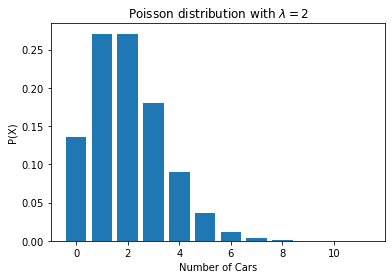

In [136]:
λ = 2

x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of Cars')
plt.ylabel('P(X)')

In [137]:
# What is the probability that no cars drive up in the noon hour?

stats.poisson(λ).pmf(0).round(3)

0.135

In [138]:
# What is the probability that 3 or more cars come through the drive through?

stats.poisson(λ).sf(2).round(3)

0.323

In [140]:
# How likely is it that the drive through gets at least 1 car?

stats.poisson(λ).sf(0).round(2)

0.86

In [2]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0
# and a standard deviation of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?

# What GPA constitutes the bottom 15% of the class?

# An eccentric alumnus left scholarship money for students in the third decile from 
# the bottom of their class. Determine the range of the third decile. Would a student 
# with a 2.8 grade point average qualify for this scholarship?

# If I have a GPA of 3.5, what percentile am I in?

In [34]:
# What grade point average is required to be in the top 5% of the graduating class?

mean = 3.0
std_dev = .3

grades = stats.norm(mean, std_dev)

In [37]:
grades.isf(.05)

3.4934560880854417

In [39]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(.15)

2.689069983151863

In [47]:
# with a 2.8 grade point average qualify for this scholarship?

grades.ppf(.3)  # yes, they would qualify

2.842679846187588

In [55]:
# If I have a GPA of 3.5, what percentile am I in?

grades.cdf(3.5)

0.9522096477271853

In [141]:
# OR by simulation

(np.random.normal(3,0.3, 100_000) < 3.5).mean()

0.95262

In [3]:
# 3. A marketing website has an average click-through rate of 2%. One day they 
# observe 4326 visitors and 97 click-throughs. How likely is it that this many 
# people or more click through?

In [142]:
n_trials = 4326
p = 0.02

click = stats.binom(n_trials, p)

In [58]:
click.sf(96)

0.1397582363130086

In [145]:
# OR using simulation 

clicks = np.random.choice([0, 1], (100_000, 4326), p = [0.98, 0.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [146]:
(clicks.sum(axis = 1) > 96).mean()

0.14104

In [148]:
# OR using poisson approximation

λ = n_trials * p

stats.poisson(λ).sf(96)

0.14211867659283192

In [4]:
# 4. You are working on some statistics homework consisting of 100 questions 
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to 
# each question.

# What is the probability that at least one of your first 60 answers is correct?

In [78]:
n_trials = 60
p = .01

answer = stats.binom(n_trials, p)

In [79]:
answer.sf(0)

0.4528433576092388

In [149]:
# or by simulation
(np.random.choice([0,1], (100_000, 60), p = [.99, .01]).sum(axis = 1) > 0).mean()

0.45434

In [5]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when 
# they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 
# students visit the break area. How likely is it that the break area gets cleaned 
# up each day? How likely is it that it goes two days without getting cleaned up? 

# All week?

In [153]:
# How likely is it that the break area gets cleaned up each day?

n_trials = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n_trials, p)

In [164]:
# How likely is it that the break area gets cleaned each day?

stats.binom(n_trials, p).pmf(0)

0.1657800711562648

Text(0.5, 0, 'Number times cleaned per day')

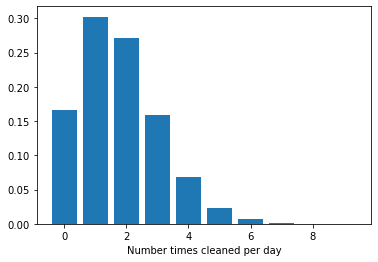

In [155]:
x = np.arange(0,10)
y = stats.binom(n_trials, p).pmf(x)

plt.bar(x,y)
plt.xlabel('Number times cleaned per day')

In [163]:
# How likely is it that it goes two days without getting cleaned up?

stats.binom(n_trials * 2, p).pmf(0)

0.02748303199257622

In [160]:
# All week?

stats.binom(n_trials * 5, p).pmf(0)

0.00012521651388091353

In [7]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually 
# very long at lunchtime. After several weeks of careful observation, you notice 
# that the average number of people in line when your lunch break starts is normally 
# distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
# for each person to order, and 10 minutes from ordering to getting your food, what 
# is the likelihood that you have at least 15 minutes left to eat your food before 
# you have to go back to class? Assume you have one hour for lunch, and ignore travel 
# time to and from La Panaderia.

In [168]:
#parameters
mean = 15 * 2 #minutes
std_dev = 3 * 2 # minutes

#Scripy Stats module
stats.norm(mean, std_dev).cdf(35)

# Max time I can be in line without being late to class = 60 - 15 - 10 = 35 minutes

0.7976716190363569

In [170]:
# or 

mean = 15
std_dev = 3

stats.norm(mean,std_dev).cdf(16)  # dividing 33 by 2

0.6305586598182363

In [171]:
#. OR
(np.random.normal(30, 6, 100_000) < 35).mean()

0.79732

In [ ]:
# 7. Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, calculate the answer 
# based on modeling the employees salaries with a normal distribution defined by the 
# calculated mean and standard deviation then compare this answer to the actual values 
# present in the salaries dataset.

# What percent of employees earn less than 60,000?

# What percent of employees earn more than 95,000?

# What percent of employees earn between 65,000 and 80,000?

# What do the top 5% of employees make?

In [104]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [110]:
employees_dataf = pd.read_sql('SELECT * FROM employees', url)
employees_dataf

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [112]:
employees_dataf.shape

(300024, 6)

In [121]:
salaries = pd.read_sql("SELECT * FROM salaries WHERE to_date > now()", url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [176]:
mean = salaries.salary.mean() 
std_dev = salaries.salary.std()

mean, std_dev

(72012.23585730705, 17309.99538025198)

In [177]:
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

In [178]:
# what percentage of employees earn more than 95,000?

stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

In [180]:
# What percentage of employees earn between 65,000 and 80,   ?

np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

In [181]:
# What do the top 5% of employees make?

stats.norm(mean, std_dev).isf(0.05)

100484.64454102777

array([[<AxesSubplot:title={'center':'emp_no'}>,
        <AxesSubplot:title={'center':'salary'}>]], dtype=object)

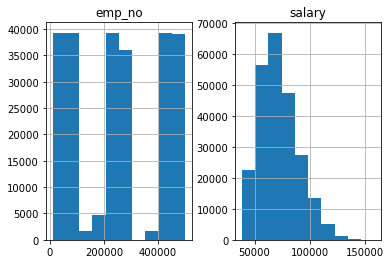

In [184]:
# Are the salaries really distributed normally?

salaries.hist()